In [1]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append("../")
from common.evaluate.evaluate import evaluation_index
import codecs
from joblib import Parallel, delayed
import pandas_datareader.data as web
import tqdm
import matplotlib.pyplot as plt


In [2]:
candle_data_path = "../data/candle_data/TOPIX/"

files = os.listdir(candle_data_path)
print(len(files))

df = pd.DataFrame()
for file in files:
    data = pd.read_csv(candle_data_path+file,index_col=0)
    # print(data.iloc[0])
    print(file)
    data = data.rename(columns={'Open': 'open', 'High': 'high','Low': 'low','Close': 'cl','Adj Close':'close','Volume': 'volume'})
    for i in [1,3,5]:
        data[f'target{i}'] = (data['price'].shift(-i) / data['price'] -1) * 100
    # display(data)
    df = pd.concat([df,data],axis=0)

display(df)



2170
東製鉄.csv
岩崎通.csv
ＴＢＳＨＤ.csv
富士急.csv
丸一鋼管.csv
名村造船.csv
アジュバンＨＤ.csv
Ｊフロント.csv
フラベッドＨ.csv
伊予銀.csv
ダイヤＨＤ.csv
ラクト・ジャパン.csv
ＣＶＳベイ.csv
林兼産.csv
ワイヤレスゲート.csv
ケーユーＨＤ.csv
オリックス.csv
東計電算.csv
ファイズＨＤ.csv
三井倉ＨＤ.csv
ブルドックソース.csv
エムスリー.csv
愛知時.csv
ゆうちょ銀行.csv
駒井ハルテク.csv
トーヨーカネツ.csv
星和電機.csv
システムサポート.csv
東急.csv
大建工.csv
アドバンスクリエイト.csv
ＴＹＫ.csv
石原ケミカル.csv
ＴＯＫＡＩ　ＨＤ.csv
日本ＢＳ放送.csv
日ユニシス.csv
ヤマハ発.csv
スター精密.csv
テクマト.csv
恵和.csv
洋インキＨＤ.csv
ＰＣＩＨＤ.csv
パイロット.csv
クロスマーケティング.csv
巴川紙.csv
野村.csv
不二越.csv
アイフィスジャパン.csv
セブン銀行.csv
東エレデバ.csv
富士通ゼ.csv
富士ピー・エス.csv
日亜鋼.csv
凸版印.csv
コナカ.csv
キリンＨＤ.csv
ヤマダＨＤ.csv
太平洋セメ.csv
ＫＬａｂ.csv
サンケン電.csv
滋賀銀.csv
日道路.csv
浜ゴム.csv
ツナグＧＨＤ.csv
ＧＳＩクレオス.csv
日本製鉄.csv
アドバネクス.csv
日東工器.csv
シーイーシー.csv
サンヨーＨ.csv
参天薬.csv
ユーグレナ.csv
近鉄ＧＨＤ.csv
ディップ.csv
ユニカフェ.csv
グローセル.csv
日ハム.csv
キッセイ薬.csv
デンヨー.csv
山陽特鋼.csv
七十七銀.csv
大豊工業.csv
ひろぎんＨＤ.csv
京阪神ビ.csv
ＷＤＢ.csv
グローバルリンクＭ.csv
ピジョン.csv
塩水糖.csv
アルゴグラフ.csv
三洋貿易.csv
ＤＯＷＡ.csv
ウシオ電.csv
高島屋.csv
ティアック.csv
百十四銀.csv
日本電設.csv
松井証.csv
トランコム.csv
中本パックス.csv
鳥取銀.csv
ゼンリン.csv
紀文食品.csv

,high,low,open,cl,volume,close,price,sma5,sma_close_ratio_5,sma25,sma_close_ratio_25,sma45,sma_close_ratio_45,sma75,sma_close_ratio_75,target1,target3,target5
Date,,,,,,,,,,,,,,,,,,
2017-05-18,877.0,835.0,840.0,874.0,2198200.0,812.492737,803.196533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.555553,5.092590,4.629626
2017-05-19,876.0,857.0,874.0,864.0,1683800.0,803.196533,847.818542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.315798,-0.986836,-2.521918
2017-05-22,912.0,862.0,870.0,912.0,2816300.0,847.818542,836.662964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.888897,0.444452,-0.777771
2017-05-23,932.0,897.0,915.0,900.0,1916100.0,836.662964,844.100037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.550654,-2.092499,-3.193828
2017-05-24,925.0,902.0,915.0,908.0,864000.0,844.100037,839.451965,828.854163,1.839392,NaN,NaN,NaN,NaN,NaN,NaN,0.110735,-1.107428,-2.990043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-11,18890.0,18270.0,18290.0,18710.0,231600.0,18710.000000,18210.000000,18764.000000,-0.287785,18532.8,0.956143,18321.555556,2.120150,18391.066667,1.734175,4.118616,5.216914,NaN
2022-05-12,18600.0,18130.0,18380.0,18210.0,169900.0,18210.000000,18960.000000,18584.000000,-2.012484,18506.8,-1.603735,18315.111111,-0.573904,18383.200000,-0.942165,1.529536,NaN,NaN
2022-05-13,19150.0,18570.0,19010.0,18960.0,233300.0,18960.000000,19250.000000,18570.000000,2.100162,18498.8,2.493135,18342.888889,3.364307,18390.933333,3.094278,-0.467532,NaN,NaN


In [23]:
def plot_scatter(target, feature, x, returns, normalize=False):
    """
    :param np.ndarray x: 指標
    :param np.ndarray returns: リターン
    :param bool normalize: x をスケーリングするかどうか
    """
    assert(len(x) == len(returns))
    # 正規化
    x = (x - x.mean()) / x.std() if normalize else x
    returns = (returns - returns.mean()) / returns.std() if normalize else returns
    
    # 散布図
    plt.plot(x, returns, 'x')
    # 回帰直線
    reg = np.polyfit(x, returns, 1)
    plt.plot(x, np.poly1d(reg)(x), color='c', linewidth=2)
    # 区間平均値
    plt.plot(*_steps(x, returns), drawstyle='steps-mid', color='r', linewidth=2)

    # 相関係数（情報係数）
    ic = np.corrcoef(x, returns)[0, 1]
    plt.title(f'{target},{feature}, IC={ic:.3f}, y={reg[0]:.3f}x{reg[1]:+.3f}')
    plt.grid()
    plt.show()
    plt.close()
    
    return ic

def _steps(x, y):
    int_x = np.round(x)
    ret_x = np.unique(int_x)
    ret_y = []
    for xa in ret_x:
        ret_y.append(np.average(y[int_x == xa]))
    return ret_x, np.array(ret_y)


In [24]:
def outlier_2s(df):

    for i in range(len(df.columns)):

        # 列を抽出する
        col = df.iloc[:,i]

        # 平均と標準偏差
        average = np.mean(col)
        sd = np.std(col)

        # 外れ値の基準点
        outlier_min = average - (sd) * 10
        outlier_max = average + (sd) * 10

        # 範囲から外れている値を除く
        col[col < outlier_min] = None
        col[col > outlier_max] = None

    return df

df = outlier_2s(df)
df = df.dropna()


,high,low,open,cl,volume,close,price,sma5,sma_close_ratio_5,sma25,sma_close_ratio_25,sma45,sma_close_ratio_45,sma75,sma_close_ratio_75,target1,target3,target5
Date,,,,,,,,,,,,,,,,,,
2017-08-30,931.0,914.0,923.0,921.0,1425100.0,856.185242,865.481384,853.582251,0.304949,885.821665,-3.345642,893.390887,-4.164543,867.749744,-1.332700,-0.537050,-0.751873,-1.503754
2017-08-31,934.0,913.0,917.0,931.0,816400.0,865.481384,860.833313,857.300745,0.954232,885.263887,-2.234645,893.638784,-3.150870,868.456260,-0.342548,0.755947,-0.863925,-1.835841
2017-09-01,937.0,924.0,935.0,926.0,863300.0,860.833313,867.340759,859.531836,0.151417,884.854846,-2.714743,893.122325,-3.615296,869.224750,-0.965393,-0.964638,-1.714907,-2.250813
2017-09-04,943.0,923.0,935.0,933.0,1202400.0,867.340759,858.974060,861.391089,0.690705,884.371443,-1.925739,892.006776,-2.765228,869.485046,-0.246616,-0.649344,-1.623364,1.190477
2017-09-05,942.0,922.0,933.0,924.0,550800.0,858.974060,853.396362,861.762952,-0.323626,883.144338,-2.736843,890.767277,-3.569195,869.782528,-1.242663,-0.108940,-0.653602,3.703693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-27,18970.0,18420.0,18510.0,18860.0,386600.0,18860.000000,19280.000000,18402.000000,2.488860,18514.800000,1.864454,18221.777778,3.502524,18397.866667,2.511885,-0.881743,-2.852697,-2.956432
2022-04-28,19320.0,18790.0,18840.0,19280.0,229500.0,19280.000000,19110.000000,18618.000000,3.555699,18536.400000,4.011566,18264.444444,5.560287,18390.666667,4.835786,-0.418629,-4.552590,-4.709576
2022-05-02,19420.0,19010.0,19210.0,19110.0,259800.0,19110.000000,19030.000000,18828.000000,1.497769,18540.400000,3.072210,18288.444444,4.492211,18390.666667,3.911404,-1.576458,-1.681555,-0.367840


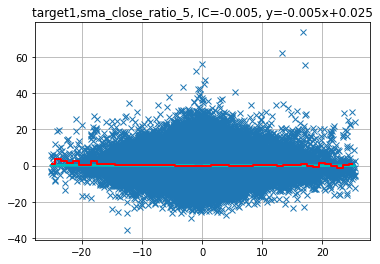

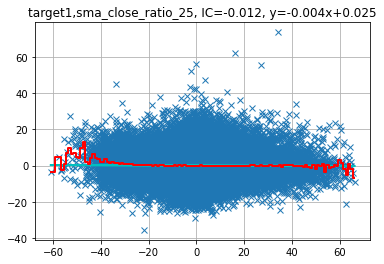

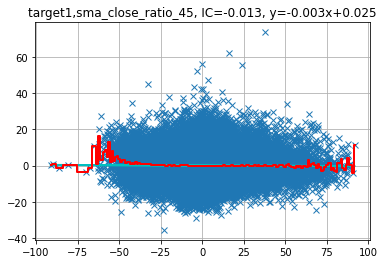

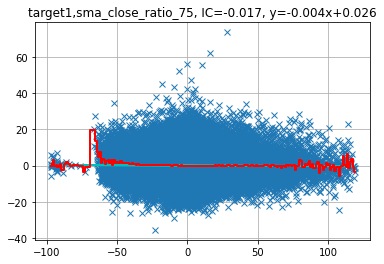

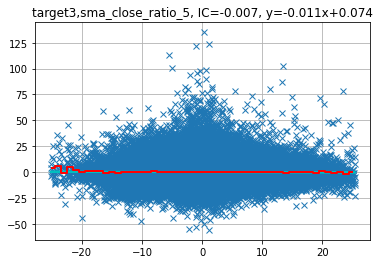

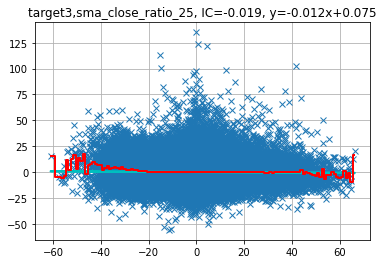

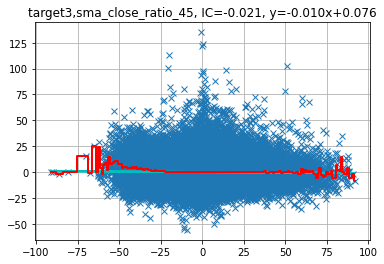

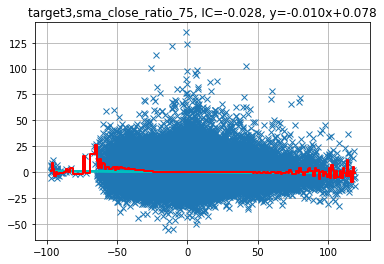

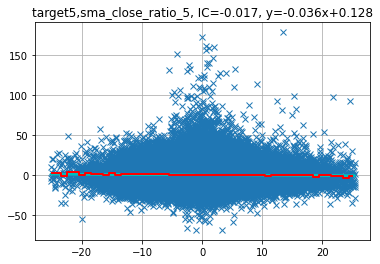

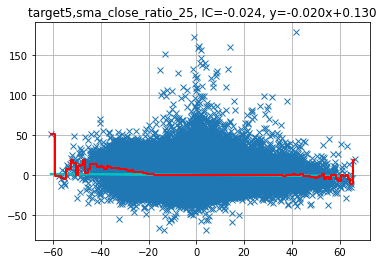

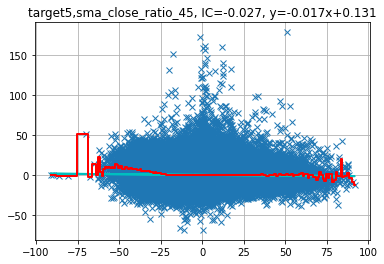

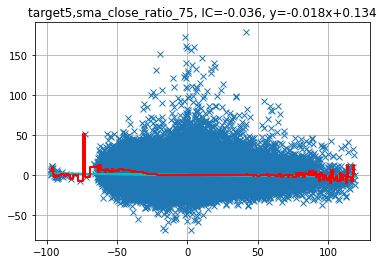

In [25]:
display(df)
for i in [1,3,5]:
    for sma in [5,25,45,75]:
            plot_scatter(f'target{i}', f'sma_close_ratio_{sma}', df[f'sma_close_ratio_{sma}'].values, df[f'target{i}'].values, normalize=False)